In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names'])


In [5]:
diabetes.data.shape

(442, 10)

In [7]:
diabetes_1 = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) 
diabetes_1.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
diabetes_1['disease_prog'] = diabetes.target
diabetes_1.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


C:\Users\alam.92\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


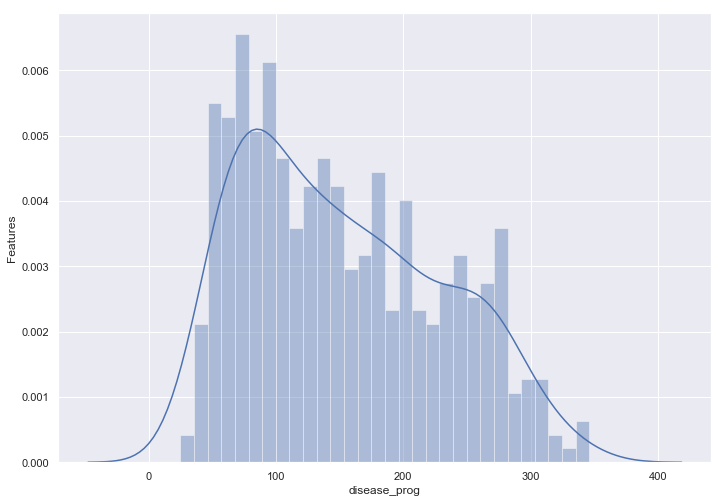

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(diabetes_1['disease_prog'], bins=30)
plt.ylabel('Features')
plt.show()

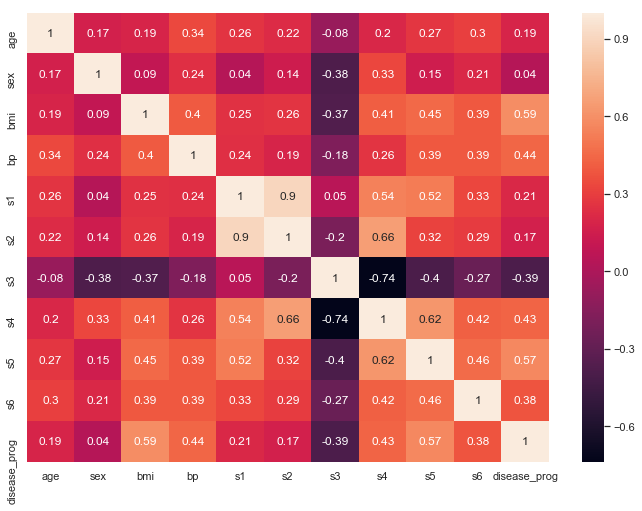

In [19]:
correlation_matrix = diabetes_1.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(diabetes.data,diabetes.target,
                                                 test_size=0.2,random_state=0)
print(X_train.shape)

(353, 10)


In [22]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)
lin_reg_model.score(X_test,Y_test)

0.33222203269065154

In [25]:
#-------------train data evaluation-------
Y_train_predict = lin_reg_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,Y_train_predict)))
r2 = r2_score(Y_train,Y_train_predict)
print("THe model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))
print("\n")
#----------test data evaluation--------------
Y_test_predict = lin_reg_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,Y_test_predict)))
r2 = r2_score(Y_test,Y_test_predict)
print("THe model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))
print("\n")

THe model performance for training set
--------------------------------------
RMSE is 52.29463904075774
R2 is 0.5539285357415583


THe model performance for training set
--------------------------------------
RMSE is 58.51766133582009
R2 is 0.33222203269065154




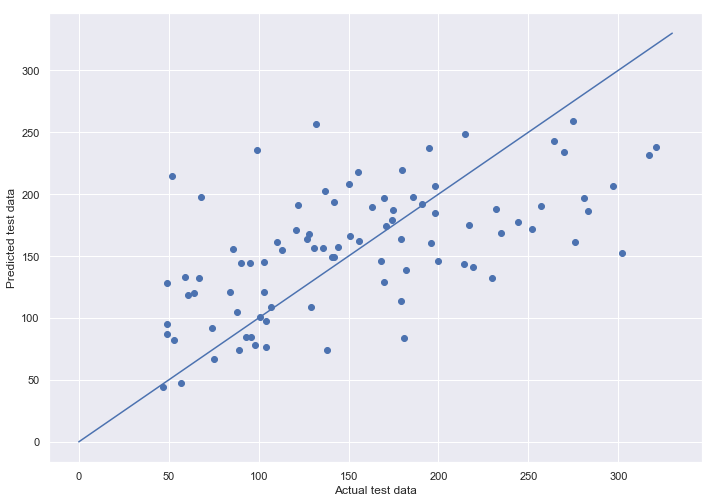

In [28]:
plt.scatter(Y_test,Y_test_predict)
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.xlabel('Actual test data')
plt.ylabel('Predicted test data')
plt.show()

In [29]:
print("Co-efficients are:")
lin_reg_model.coef_
print("Intercept is:")
lin_reg_model.intercept_

Co-efficients are:
Intercept is:


152.5381335195406